## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset
spotify = pd.read_csv('spotify_df.csv')

In [3]:
spotify1 =pd.read_csv('spotify1__df.csv')

In [4]:
all_spotify=pd.concat([spotify, spotify1], axis=0).reset_index()



In [5]:
all_spotify

,index,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0,0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,...,151.106,audio_features,5SfM1f729pv1DdiEcyDiex,spotify:track:5SfM1f729pv1DdiEcyDiex,https://api.spotify.com/v1/tracks/5SfM1f729pv1...,https://api.spotify.com/v1/audio-analysis/5SfM...,204693,4,Yola,Diamond Studded Shoes
1,1,1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,...,90.061,audio_features,7gyDV6Y7GmHqQS4KnzI5Zk,spotify:track:7gyDV6Y7GmHqQS4KnzI5Zk,https://api.spotify.com/v1/tracks/7gyDV6Y7GmHq...,https://api.spotify.com/v1/audio-analysis/7gyD...,214187,4,The War and Treaty,Are You Ready to Love Me?
2,2,2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,...,97.923,audio_features,0bRXwKfigvpKZUurwqAlEh,spotify:track:0bRXwKfigvpKZUurwqAlEh,https://api.spotify.com/v1/tracks/0bRXwKfigvpK...,https://api.spotify.com/v1/audio-analysis/0bRX...,254560,4,Bill Withers,Lovely Day
3,3,3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,...,115.002,audio_features,2JHHXGSC6Ra3IJOBNLbhS6,spotify:track:2JHHXGSC6Ra3IJOBNLbhS6,https://api.spotify.com/v1/tracks/2JHHXGSC6Ra3...,https://api.spotify.com/v1/audio-analysis/2JHH...,178290,4,Jon Batiste,FREEDOM
4,4,4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,...,125.960,audio_features,241RmK77gecJ1y7jOoQ5lu,spotify:track:241RmK77gecJ1y7jOoQ5lu,https://api.spotify.com/v1/tracks/241RmK77gecJ...,https://api.spotify.com/v1/audio-analysis/241R...,171360,4,Natalie Cole,This Will Be (An Everlasting Love) - 2003 Rema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,1768,135,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,...,122.019,audio_features,0BbYTaDH81up32xTKIGjbS,spotify:track:0BbYTaDH81up32xTKIGjbS,https://api.spotify.com/v1/tracks/0BbYTaDH81up...,https://api.spotify.com/v1/audio-analysis/0BbY...,175164,4,Katja Krasavice,Onlyfans
5084,1769,136,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,...,120.966,audio_features,3uUuGVFu1V7jTQL60S1r8z,spotify:track:3uUuGVFu1V7jTQL60S1r8z,https://api.spotify.com/v1/tracks/3uUuGVFu1V7j...,https://api.spotify.com/v1/audio-analysis/3uUu...,148197,4,Lost Frequencies,Where Are You Now
5085,1770,137,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,...,139.317,audio_features,35VFenXHO0oWYugtj94zgi,spotify:track:35VFenXHO0oWYugtj94zgi,https://api.spotify.com/v1/tracks/35VFenXHO0oW...,https://api.spotify.com/v1/audio-analysis/35VF...,242320,5,Pitbull,Oye
5086,1771,138,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,...,134.834,audio_features,1HIpZLA28pXpKvuFTvlZHH,spotify:track:1HIpZLA28pXpKvuFTvlZHH,https://api.spotify.com/v1/tracks/1HIpZLA28pXp...,https://api.spotify.com/v1/audio-analysis/1HIp...,267400,4,Ultravox,Hymn


In [6]:
all_spotify.drop(columns =["Unnamed: 0", "index"], inplace=True)

In [7]:
all_spotify

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,0.0807,0.562,151.106,audio_features,5SfM1f729pv1DdiEcyDiex,spotify:track:5SfM1f729pv1DdiEcyDiex,https://api.spotify.com/v1/tracks/5SfM1f729pv1...,https://api.spotify.com/v1/audio-analysis/5SfM...,204693,4,Yola,Diamond Studded Shoes
1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,0.1300,0.697,90.061,audio_features,7gyDV6Y7GmHqQS4KnzI5Zk,spotify:track:7gyDV6Y7GmHqQS4KnzI5Zk,https://api.spotify.com/v1/tracks/7gyDV6Y7GmHq...,https://api.spotify.com/v1/audio-analysis/7gyD...,214187,4,The War and Treaty,Are You Ready to Love Me?
2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,0.1050,0.706,97.923,audio_features,0bRXwKfigvpKZUurwqAlEh,spotify:track:0bRXwKfigvpKZUurwqAlEh,https://api.spotify.com/v1/tracks/0bRXwKfigvpK...,https://api.spotify.com/v1/audio-analysis/0bRX...,254560,4,Bill Withers,Lovely Day
3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,0.2130,0.828,115.002,audio_features,2JHHXGSC6Ra3IJOBNLbhS6,spotify:track:2JHHXGSC6Ra3IJOBNLbhS6,https://api.spotify.com/v1/tracks/2JHHXGSC6Ra3...,https://api.spotify.com/v1/audio-analysis/2JHH...,178290,4,Jon Batiste,FREEDOM
4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,0.0469,0.914,125.960,audio_features,241RmK77gecJ1y7jOoQ5lu,spotify:track:241RmK77gecJ1y7jOoQ5lu,https://api.spotify.com/v1/tracks/241RmK77gecJ...,https://api.spotify.com/v1/audio-analysis/241R...,171360,4,Natalie Cole,This Will Be (An Everlasting Love) - 2003 Rema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,0.771,122.019,audio_features,0BbYTaDH81up32xTKIGjbS,spotify:track:0BbYTaDH81up32xTKIGjbS,https://api.spotify.com/v1/tracks/0BbYTaDH81up...,https://api.spotify.com/v1/audio-analysis/0BbY...,175164,4,Katja Krasavice,Onlyfans
5084,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,audio_features,3uUuGVFu1V7jTQL60S1r8z,spotify:track:3uUuGVFu1V7jTQL60S1r8z,https://api.spotify.com/v1/tracks/3uUuGVFu1V7j...,https://api.spotify.com/v1/audio-analysis/3uUu...,148197,4,Lost Frequencies,Where Are You Now
5085,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,0.515,139.317,audio_features,35VFenXHO0oWYugtj94zgi,spotify:track:35VFenXHO0oWYugtj94zgi,https://api.spotify.com/v1/tracks/35VFenXHO0oW...,https://api.spotify.com/v1/audio-analysis/35VF...,242320,5,Pitbull,Oye
5086,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,0.627,134.834,audio_features,1HIpZLA28pXpKvuFTvlZHH,spotify:track:1HIpZLA28pXpKvuFTvlZHH,https://api.spotify.com/v1/tracks/1HIpZLA28pXp...,https://api.spotify.com/v1/audio-analysis/1HIp...,267400,4,Ultravox,Hymn


## Scaling features

In [8]:
all_spotify.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5.088000e+03,5088.000000
mean,0.646714,0.544249,5.065252,-9.383852,0.624214,0.098396,0.349456,0.153644,0.166712,0.509171,119.594594,2.088021e+05,3.922956
std,0.159297,0.228688,3.608966,5.771601,0.484373,0.101368,0.320912,0.311862,0.132211,0.233582,28.793099,8.278333e+04,0.360688
min,0.000000,0.002120,0.000000,-43.738000,0.000000,0.000000,0.000018,0.000000,0.005350,0.000000,0.000000,5.061300e+04,0.000000
25%,0.556000,0.387000,1.000000,-11.164750,0.000000,0.038200,0.060800,0.000000,0.094775,0.331000,97.508500,1.624042e+05,4.000000
50%,0.664000,0.572000,5.000000,-7.410500,1.000000,0.053150,0.240000,0.000011,0.117000,0.510000,119.602500,1.967880e+05,4.000000
75%,0.758000,0.718000,8.000000,-5.507000,1.000000,0.109000,0.634000,0.022625,0.184250,0.695000,139.958250,2.344132e+05,4.000000
max,0.980000,1.000000,11.000000,0.175000,1.000000,0.916000,0.996000,0.976000,0.986000,0.979000,216.587000,1.252322e+06,5.000000


In [9]:
all_spotify_num = all_spotify._get_numeric_data()

In [10]:
X= all_spotify_num

In [11]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693,4
1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187,4
2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560,4
3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290,4
4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164,4
5084,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197,4
5085,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320,5
5086,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400,4


In [12]:
X.drop(columns =["key", "mode", "time_signature"], inplace=True)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.522,0.817,-6.170,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693
1,0.533,0.776,-7.092,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187
2,0.692,0.651,-8.267,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560
3,0.873,0.651,-4.179,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290
4,0.682,0.605,-10.771,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360
...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,-8.462,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164
5084,0.671,0.636,-8.117,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197
5085,0.573,0.856,-4.807,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320
5086,0.514,0.661,-11.447,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400


The scale of "tempo" and "duration_ms" is much bigger than the scale of many other variable!

K-Means is a distance based algorithm: we need to scale / normalize!:

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.522,0.817,-6.170,0.0512,0.3290,0.000002,0.0807,0.562,151.106,204693
1,0.533,0.776,-7.092,0.0847,0.1510,0.000087,0.1300,0.697,90.061,214187
2,0.692,0.651,-8.267,0.0324,0.2920,0.002410,0.1050,0.706,97.923,254560
3,0.873,0.651,-4.179,0.0374,0.0251,0.000107,0.2130,0.828,115.002,178290
4,0.682,0.605,-10.771,0.0403,0.1850,0.003260,0.0469,0.914,125.960,171360


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.782979,1.192791,0.556894,-0.465635,-0.063750,-0.492709,-0.650630,0.226191,1.094516,-0.049642
1,-0.713919,1.013490,0.397130,-0.135124,-0.618475,-0.492437,-0.277705,0.804202,-1.025819,0.065054
2,0.284311,0.466841,0.193527,-0.651116,-0.179058,-0.484986,-0.466815,0.842736,-0.752740,0.552797
3,1.420662,0.466841,0.901893,-0.601786,-1.010833,-0.492371,0.350142,1.365088,-0.159519,-0.368614
4,0.221530,0.265674,-0.240364,-0.573175,-0.512516,-0.482260,-0.906307,1.733302,0.221096,-0.452335


In [14]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03,5.088000e+03
mean,-4.772453e-16,-7.597871e-17,2.914772e-16,-1.190522e-16,1.180703e-16,-8.003730e-17,5.204170e-18,3.332415e-16,-8.797994e-17,3.789116e-16
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-4.060189e+00,-2.370837e+00,-5.952859e+00,-9.707744e-01,-1.088998e+00,-4.927146e-01,-1.220609e+00,-2.180050e+00,-4.153994e+00,-1.911069e+00
25%,-5.695211e-01,-6.876820e-01,-3.085925e-01,-5.938933e-01,-8.995765e-01,-4.927146e-01,-5.441610e-01,-7.628513e-01,-7.671375e-01,-5.605285e-01
50%,1.085223e-01,1.213587e-01,3.419409e-01,-4.463966e-01,-3.411123e-01,-4.926780e-01,-3.760419e-01,3.549207e-03,2.746017e-04,-1.451414e-01
75%,6.986712e-01,7.598449e-01,6.717778e-01,1.046193e-01,8.867611e-01,-4.201594e-01,1.326648e-01,7.956392e-01,7.073104e-01,3.094060e-01
max,2.092427e+00,1.993085e+00,1.656350e+00,8.066480e+00,2.014909e+00,2.637178e+00,6.197433e+00,2.011604e+00,3.368930e+00,1.260667e+01


Now, all features will have the same weight.

## Clustering the music with K-Means

In [15]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [16]:
kmeans.labels_

array([0, 2, 2, ..., 4, 0, 2], dtype=int32)

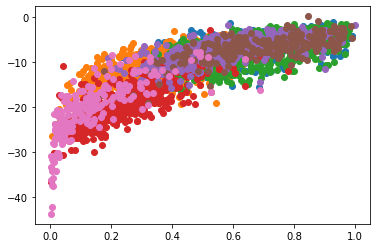

In [17]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [18]:
# Now we have our "model", let's get the clusters and how many observations has each cluster.

In [19]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1251
1     748
2    1305
3     686
4     647
5     249
6     202
dtype: int64

Now let's see to which group was assigned every song.

In [20]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.522,0.817,-6.170,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693,0
1,0.533,0.776,-7.092,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187,2
2,0.692,0.651,-8.267,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560,2
3,0.873,0.651,-4.179,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290,2
4,0.682,0.605,-10.771,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360,2
...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,-8.462,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164,2
5084,0.671,0.636,-8.117,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197,0
5085,0.573,0.856,-4.807,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320,4
5086,0.514,0.661,-11.447,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400,0


In [31]:
cluster_id=pd.concat([X, all_spotify], axis=1)
cluster_id

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0.522,0.817,-6.170,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693,...,151.106,audio_features,5SfM1f729pv1DdiEcyDiex,spotify:track:5SfM1f729pv1DdiEcyDiex,https://api.spotify.com/v1/tracks/5SfM1f729pv1...,https://api.spotify.com/v1/audio-analysis/5SfM...,204693,4,Yola,Diamond Studded Shoes
1,0.533,0.776,-7.092,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187,...,90.061,audio_features,7gyDV6Y7GmHqQS4KnzI5Zk,spotify:track:7gyDV6Y7GmHqQS4KnzI5Zk,https://api.spotify.com/v1/tracks/7gyDV6Y7GmHq...,https://api.spotify.com/v1/audio-analysis/7gyD...,214187,4,The War and Treaty,Are You Ready to Love Me?
2,0.692,0.651,-8.267,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560,...,97.923,audio_features,0bRXwKfigvpKZUurwqAlEh,spotify:track:0bRXwKfigvpKZUurwqAlEh,https://api.spotify.com/v1/tracks/0bRXwKfigvpK...,https://api.spotify.com/v1/audio-analysis/0bRX...,254560,4,Bill Withers,Lovely Day
3,0.873,0.651,-4.179,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290,...,115.002,audio_features,2JHHXGSC6Ra3IJOBNLbhS6,spotify:track:2JHHXGSC6Ra3IJOBNLbhS6,https://api.spotify.com/v1/tracks/2JHHXGSC6Ra3...,https://api.spotify.com/v1/audio-analysis/2JHH...,178290,4,Jon Batiste,FREEDOM
4,0.682,0.605,-10.771,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360,...,125.960,audio_features,241RmK77gecJ1y7jOoQ5lu,spotify:track:241RmK77gecJ1y7jOoQ5lu,https://api.spotify.com/v1/tracks/241RmK77gecJ...,https://api.spotify.com/v1/audio-analysis/241R...,171360,4,Natalie Cole,This Will Be (An Everlasting Love) - 2003 Rema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,-8.462,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164,...,122.019,audio_features,0BbYTaDH81up32xTKIGjbS,spotify:track:0BbYTaDH81up32xTKIGjbS,https://api.spotify.com/v1/tracks/0BbYTaDH81up...,https://api.spotify.com/v1/audio-analysis/0BbY...,175164,4,Katja Krasavice,Onlyfans
5084,0.671,0.636,-8.117,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197,...,120.966,audio_features,3uUuGVFu1V7jTQL60S1r8z,spotify:track:3uUuGVFu1V7jTQL60S1r8z,https://api.spotify.com/v1/tracks/3uUuGVFu1V7j...,https://api.spotify.com/v1/audio-analysis/3uUu...,148197,4,Lost Frequencies,Where Are You Now
5085,0.573,0.856,-4.807,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320,...,139.317,audio_features,35VFenXHO0oWYugtj94zgi,spotify:track:35VFenXHO0oWYugtj94zgi,https://api.spotify.com/v1/tracks/35VFenXHO0oW...,https://api.spotify.com/v1/audio-analysis/35VF...,242320,5,Pitbull,Oye
5086,0.514,0.661,-11.447,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400,...,134.834,audio_features,1HIpZLA28pXpKvuFTvlZHH,spotify:track:1HIpZLA28pXpKvuFTvlZHH,https://api.spotify.com/v1/tracks/1HIpZLA28pXp...,https://api.spotify.com/v1/audio-analysis/1HIp...,267400,4,Ultravox,Hymn


In [38]:
cluster_id.to_csv(r'cluster_id.csv')

In [32]:
X[X['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
1205,0.699,0.882,-3.896,0.0311,0.00296,0.0544,0.13,0.657,120.016,196813,2


## Playing with the parameters

In [33]:

kmeans.inertia_

23706.294110043833

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

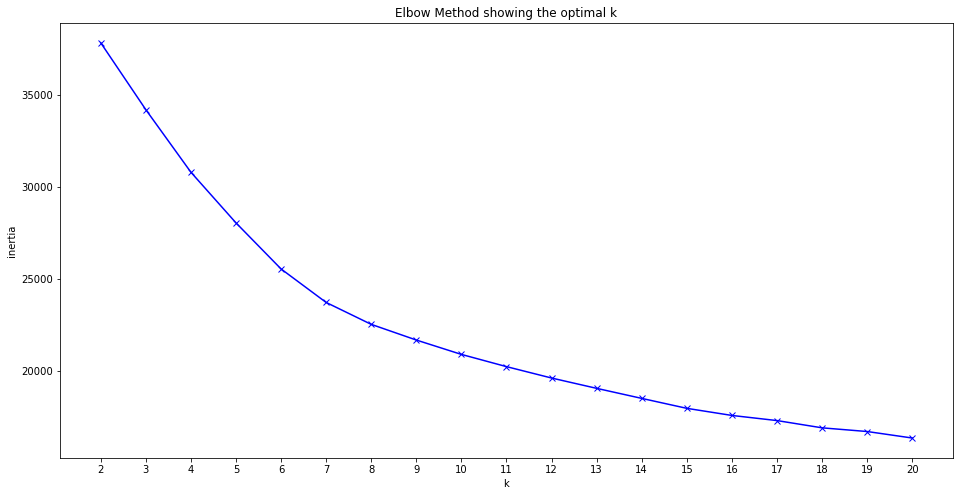

In [34]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

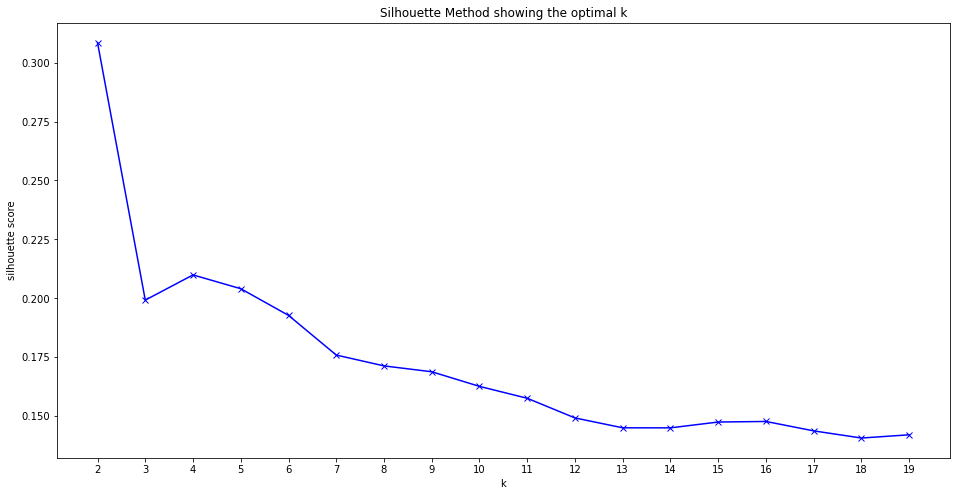

In [35]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [36]:
kmeans = KMeans(n_clusters=7,
                    random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [37]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_7.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [27]:
#all_spotify_df.to_csv(r'all_spotify__df.csv')